## The data given in the url  is related with direct marketing campaigns of a banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. Build a model to predict whether client will subscribe to term deposit


### Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/home/admin1/PycharmProjects/Models in Machine Learning/')
from ipynb.fs.full.ml_library import *

# reading dataset from csv file & storing pandas dataframe
bank_data = pd.read_csv('bank.csv', sep=';')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [2]:
bank_data.isna().sum()       # checking null values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [3]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
# mapping target variable i.e. column 'y' to 0 & 1
# mapping  'no' -> 0  &  'yes' -> 1
bank_data.loc[bank_data['y'] == 'no', 'y'] = 0
bank_data.loc[bank_data['y'] == 'yes', 'y']= 1
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


#### Checking all features have contributed to target variable or not

In [5]:
# checking numeric columns variation with target variable
bank_data.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
0,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
1,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


In [6]:
bank_data.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous,y
marital,,,,,,,,
divorced,45.475379,1122.390152,15.753788,279.232955,2.604167,38.827652,0.439394,0.145833
married,43.454415,1463.195567,15.905971,256.528781,2.847336,38.466929,0.519128,0.099035
single,33.927258,1460.414716,16.008361,274.601171,2.751672,43.220736,0.642977,0.139632


In [7]:
bank_data.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous,y
education,,,,,,,,
primary,46.833333,1411.544248,15.505900,261.709440,2.865782,35.069322,0.460177,0.094395
secondary,40.062446,1196.814397,15.977884,269.863833,2.734172,40.934085,0.528621,0.106245
tertiary,39.645926,1775.423704,16.009630,256.881481,2.901481,39.824444,0.612593,0.142963
unknown,45.299465,1701.245989,15.946524,250.449198,2.486631,41.983957,0.508021,0.101604


In [8]:
bank_data.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous,y
job,,,,,,,,
admin.,39.682008,1226.736402,16.324268,234.669456,2.631799,49.993724,0.644351,0.121339
blue-collar,40.156448,1085.161734,15.482030,278.161734,2.846723,41.590909,0.493658,0.072939
entrepreneur,42.011905,1645.125000,15.255952,285.476190,2.589286,32.273810,0.428571,0.089286
housemaid,47.339286,2083.803571,15.294643,292.633929,2.500000,26.401786,0.357143,0.125000
management,40.540764,1766.928793,16.254902,260.536636,2.973168,40.968008,0.549020,0.135191
retired,61.869565,2319.191304,15.556522,285.656522,2.465217,35.073913,0.591304,0.234783
self-employed,41.453552,1392.409836,16.180328,264.125683,3.278689,28.256831,0.590164,0.109290
services,38.570743,1103.956835,15.515588,262.486811,2.822542,36.371703,0.443645,0.091127
student,26.821429,1543.821429,16.392857,248.690476,2.392857,45.714286,0.964286,0.226190


In [9]:
bank_data.groupby('poutcome').mean()

,age,balance,day,duration,campaign,pdays,previous,y
poutcome,,,,,,,,
failure,41.555102,1644.646939,14.395918,254.383673,1.955102,243.167347,2.851020,0.128571
other,39.873096,1424.472081,15.101523,273.832487,2.350254,219.385787,3.385787,0.192893
success,44.170543,1949.410853,14.581395,338.635659,1.736434,163.713178,3.015504,0.643411
unknown,41.083671,1374.862078,16.205938,262.103104,2.964912,-1.000000,0.000000,0.090958


In [10]:
bank_data.groupby('housing').mean()

,age,balance,day,duration,campaign,pdays,previous,y
housing,,,,,,,,
no,43.511723,1595.277268,16.209990,259.290520,2.80632,26.402141,0.467890,0.153415
yes,39.374756,1290.309496,15.689332,267.542399,2.78390,50.013286,0.599844,0.085971


In [11]:
bank_data.groupby('loan').mean()

,age,balance,day,duration,campaign,pdays,previous,y
loan,,,,,,,,
no,41.220627,1513.857963,15.932376,264.512794,2.771018,41.088512,0.558486,0.124804
yes,40.890014,917.163531,15.820550,260.904486,2.918958,32.439942,0.454414,0.062229


In [12]:
bank_data.groupby('default').mean()

,age,balance,day,duration,campaign,pdays,previous,y
default,,,,,,,,
no,41.194826,1450.550956,15.929584,264.355906,2.79865,40.111136,0.548481,0.115186
yes,39.723684,-208.723684,15.078947,240.881579,2.50000,19.618421,0.197368,0.118421


#### Dropping unnecessary columns

In [13]:
bank_data.drop(['age','default', 'balance', 'contact', 'day', 'month','campaign'], axis=1, inplace=True)
bank_data.head()

,job,marital,education,housing,loan,duration,pdays,previous,poutcome,y
0,unemployed,married,primary,no,no,79,-1,0,unknown,0
1,services,married,secondary,yes,yes,220,339,4,failure,0
2,management,single,tertiary,yes,no,185,330,1,failure,0
3,management,married,tertiary,yes,yes,199,-1,0,unknown,0
4,blue-collar,married,secondary,yes,no,226,-1,0,unknown,0


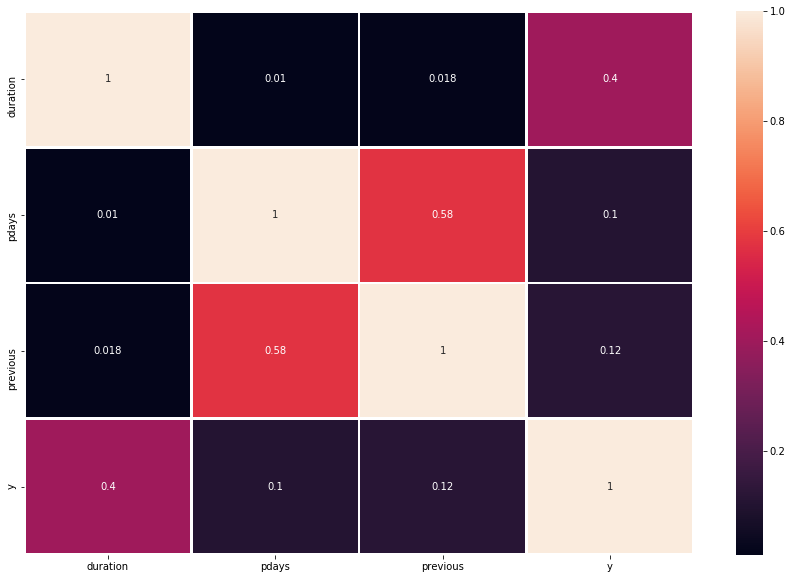

In [14]:
# checking if any of pairs of features that are well correlated to each other so one of it can be removed
plt.figure(figsize=(15,10))
sns.heatmap(bank_data.corr(), annot=True, linewidths=2)
plt.show()

In [15]:
# no any pair of well correlated columns are present so not eliminating any column now

#### Handling categorical data

In [16]:
bank_data = one_hot_encoding(bank_data)
bank_data.head()

,housing,loan,duration,pdays,previous,y,admin.,blue-collar,entrepreneur,housemaid,...,unknown,divorced,married,single,primary,secondary,tertiary,failure,other,success
0,0,0,79,-1,0,0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,1,220,339,4,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,0,185,330,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1,1,199,-1,0,0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,0,226,-1,0,0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### Scaling of data

In [17]:
bank_data = min_max_normalisation(bank_data)
bank_data.head()

,housing,loan,duration,pdays,previous,y,admin.,blue-collar,entrepreneur,housemaid,...,unknown,divorced,married,single,primary,secondary,tertiary,failure,other,success
0,0.0,0.0,0.024826,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.071500,0.389908,0.16,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.059914,0.379587,0.04,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,1.0,0.064548,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.073486,0.000000,0.00,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### Splitting dataset into train & test set

In [18]:
train, test = splitting_dataset(bank_data)
print('Train set')
print(train.shape)
train.head()

Train set
(3165, 27)


,housing,loan,duration,pdays,previous,y,admin.,blue-collar,entrepreneur,housemaid,...,unknown,divorced,married,single,primary,secondary,tertiary,failure,other,success
3542,1.0,0.0,0.031447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2687,0.0,0.0,0.023833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2053,1.0,0.0,0.006289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3966,0.0,0.0,0.085071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1602,1.0,0.0,0.065872,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [19]:
print('Test set')
print(test.shape)
test.head()

Test set
(1356, 27)


,housing,loan,duration,pdays,previous,y,admin.,blue-collar,entrepreneur,housemaid,...,unknown,divorced,married,single,primary,secondary,tertiary,failure,other,success
1,1.0,1.0,0.071500,0.389908,0.16,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,1.0,0.0,0.048659,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.017544,0.000000,0.00,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13,0.0,0.0,0.085071,0.000000,0.00,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
14,1.0,1.0,0.028136,0.277523,0.04,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


#### Creating predictors & target variables in both data set

In [20]:
def create_pred_target(data):   
    """Function returns predictors' matrix & target variable's array for given dataset"""
    y_values = np.array(data['y'])
    x_values = np.ones(len(data)).reshape(1,len(data))
    
    for col in data.columns:
        if col != 'y':
            new_row = np.array(data[col]).reshape(1,len(data))
            x_values = np.append(x_values, new_row, axis=0)

    return x_values, y_values

train_x_values, train_y_values = create_pred_target(train)
test_x_values, test_y_values = create_pred_target(test)

In [21]:
train_x_values.shape

(27, 3165)

### Building single neural network model

In [22]:
total = len(train)        # total training records

def sigmoid(Z):
    return 1/(1 + np.exp(-Z))

# weights for input to first layer   # here we have 4 neurons in first layer 
W1 = np.random.rand(4, len(train_x_values)) * 0.01   

# taking random weights for input to final/output layer
W2 = np.random.rand(4)               
b2 = np.random.rand(4,1)
W3 = np.random.rand(4)
b3 = np.random.rand(1)

In [23]:
def multi_layer_nn(x_values, y_values,W1, W2, W3, b2, b3):
    iterations = 10000
    alpha = 0.1
    costs = []
    
    for _ in range(iterations):
        # creating array like multiple linear regression for first layer neurons
        Z1 = W1.dot(x_values) 

        # creating neurons in first layer
        A1 = sigmoid(Z1) 
        
        # creating array like multiple linear regression for output/final layer
        Z2 = W2.dot(A1) + b2 

        # applying sigmoid function as activation function for neurons in second layer
        A2 = sigmoid(Z2)
           
        Z3 = W3.dot(A2) + b3
        
        # implementing sigmoid function find probablity of default category
        A3 = sigmoid(Z3)
        
        # calculating cost at each iteration
        cost = (-(y_values * np.log(A3) + (1 - y_values) * np.log(1 - A3))).mean()
        
        costs.append(cost)
        

        # defining derivatives for 
        dZ3 = A3 - train_y_values
        
        dW3 = dZ3.dot(A2.T)/total 
             
        db3 = dZ3.sum()/total 
        
        dZ2 = W3.dot(dZ3 * A2 * (1 - A2))                     #  derivative of the sigmoid function

        dW2 = (dZ2.dot(A1.T))/ total
        
        db2 = dZ2.sum()/total

        dZ1 = W2.dot(dZ2 * A1 * (1 - A1))           # element wise product (*)

        dW1 = (dZ1.dot(x_values.T))/total  
        
        
        W1 = W1 - alpha * dW1
        W2 = W2 - alpha * dW2
        W3 = W3 - alpha * dW3
        b2 = b2 - alpha * db2
        b3 = b3 - alpha * db3
        
    return W1 ,W2, W3, b2, b3, costs

In [24]:
W1, W2, W3, b2, b3,costs = multi_layer_nn(train_x_values, train_y_values, W1, W2, W3, b2, b3)

#### Plotting cost vs iterations

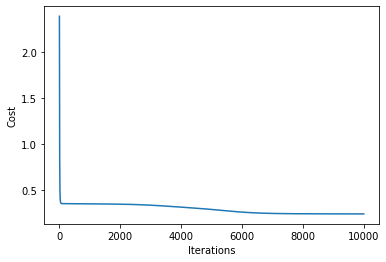

In [25]:
plt.plot(np.arange(10000), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [26]:
def predict(x_values):
   # creating array like multiple linear regression for first layer neurons
    Z1 = W1.dot(x_values) 

    # creating neurons in first layer
    A1 = sigmoid(Z1) 

    # creating array like multiple linear regression for output/final layer
    Z2 = W2.dot(A1) + b2 

    # applying sigmoid function as activation function for neurons in second layer
    A2 = sigmoid(Z2)
        
    Z3 = W3.dot(A2) + b3
        
    # implementing sigmoid function find probablity of default category
    A3 = sigmoid(Z3)
    
    return A3 

#### Storing predictions for train set & test set

In [27]:
train_predicted_values = predict(train_x_values)
test_predicted_values = predict(test_x_values)

In [28]:
train_predicted_values = categorise_logistic(train_predicted_values)
test_predicted_values = categorise_logistic(test_predicted_values)

### Evaluating model against train & test set

In [29]:
train_accuracy_percent = accuracy_classification(train_predicted_values, train_y_values)
train_accuracy_percent

90.07898894154819

In [30]:
test_accuracy_percent = accuracy_classification(test_predicted_values, test_y_values)
test_accuracy_percent

89.67551622418878